### Select features, train, save model for each target

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import pickle

In [2]:
mutants = pd.read_csv('../data/all_data_13.csv',index_col=0)
mutants.head(5)

,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
WT,8.719377,8.960088,5.003403,8.743338,5.370779,10.313125,3.935282,6.812850,6.472343,5.387758,...,5248.663203,16459.030703,14109.667929,921.058392,1758.194055,199.991133,76.375142,2065.592332,474.343120,143.661484
YAL017W,8.653198,8.824927,5.155914,8.670526,5.374893,10.272428,2.955933,6.961889,6.299363,5.526707,...,13.066836,17002.046210,13710.190749,951.437296,11.132119,6.455504,1.349970,85.700836,79.431617,0.806534
YAR018C,8.797391,8.550221,4.993235,8.556956,5.578207,10.390911,4.389316,7.254334,6.437292,5.498802,...,19.361500,19919.397972,13448.417525,882.991924,14.230257,5.631380,1.585306,73.672407,108.635344,1.148182
YBL016W,8.543181,8.691758,4.663340,9.116122,3.596748,9.584951,4.563300,8.003110,6.923137,5.737214,...,11798.792914,17113.405359,11784.749618,654.096269,2116.528559,219.251307,103.318199,3495.661987,727.906677,206.846696
YBL088C,8.694384,8.763244,4.984653,9.056300,3.682467,9.651980,4.139872,7.229609,6.447050,5.264817,...,16.298688,14304.146218,12071.678784,604.834183,17.417181,8.438564,1.374669,92.136368,81.188838,1.095210


In [3]:
#selected_variance = pd.read_csv('../data/selection_variance.csv',index_col=0)
#selected_variance.head(5)

### Create x and y for a specific Metabolite

In [4]:
position = 731  # from 726 to are metabolites

In [5]:
#get the name of the column accroding to position
print('Example') 
print(mutants.columns.get_values()[position])

Example
D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate


In [6]:
#choose metabolite (target) by position

x = mutants.iloc[:,0:725]   #stays like this
y = mutants.iloc[:,position]
#y = y/y.max()

### Reduce features according to best individual regression

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

In [8]:
#create, fit selector and get the best (k) features
selector = SelectKBest(f_regression, k=200)  #200 chosen after for loop
selector.fit(x, y)
mask = selector.get_support()
new_features = x.columns[mask]
new_x = pd.DataFrame(x, columns=new_features)
new_x.head()

,YAL012W,YAL035W,YAL044C,YAR002C-A,YAR015W,YBL026W,YBR085C-A,YBR089C-A,YBR106W,YBR111C,...,YPL160W,YPL218W,YPL225W,YPL231W,YPR033C,YPR035W,YPR036W,YPR074C,YPR103W,YPR165W
WT,8.743338,5.370779,6.812850,6.472343,7.579128,5.405962,4.211866,5.762258,5.383726,5.007851,...,7.131108,7.735359,5.025493,7.950419,6.687075,7.312082,6.652176,8.496313,5.812644,6.990033
YAL017W,8.670526,5.374893,6.961889,6.299363,7.622924,5.359329,4.204216,5.624497,5.419867,5.345102,...,7.183191,7.744732,4.656182,7.843990,6.522794,7.642587,6.472836,8.456138,5.874653,6.827223
YAR018C,8.556956,5.578207,7.254334,6.437292,7.712280,5.295463,5.044604,5.674102,4.968507,4.755656,...,6.890116,7.722752,4.958785,7.755970,6.595939,7.724236,6.529917,8.388259,5.747122,7.033319
YBL016W,9.116122,3.596748,8.003110,6.923137,7.560972,5.909985,4.302803,6.662682,4.357893,5.981816,...,7.182479,7.399766,2.869029,7.000672,6.975286,8.027934,6.497148,7.360402,6.134415,6.653605
YBL088C,9.056300,3.682467,7.229609,6.447050,7.733115,5.052274,4.628696,5.760721,5.157177,5.509176,...,6.669079,7.550100,4.338337,6.687051,6.683923,7.820235,6.195360,8.281126,5.745920,6.825362


In [9]:
#file_name_selection1 = '../data/selected features/200/data_selection_738_200.csv'
#new_x.to_csv(file_name_selection1, index=True)

### Apply RFE to the best n features to select according to weight

In [10]:
from sklearn.feature_selection import RFE

In [11]:
regr = linear_model.LinearRegression()
regr.fit(new_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Accuracy vs. Features')

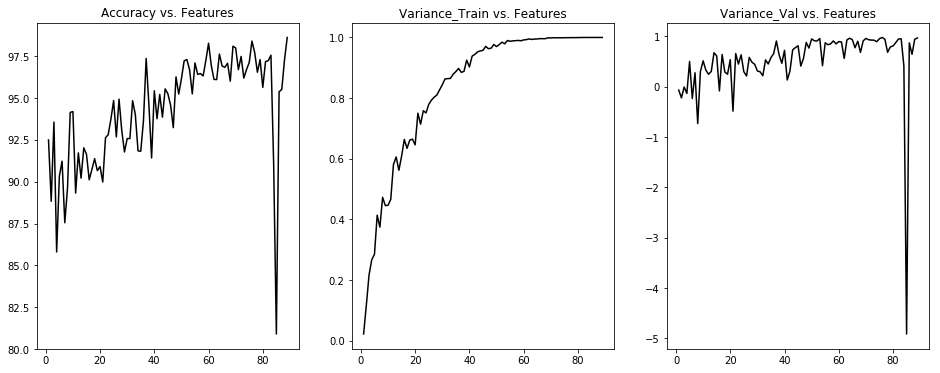

In [12]:
variance_scores_v = []
variance_scores_p = []
n_features = []
accuracies = []

for i in range (1,90): 
    
    selector_2 = RFE(estimator=regr, n_features_to_select= i, step=1)
    selector_2.fit(new_x, y)
    mask_2 = selector_2.get_support()
    new_features_2 = new_x.columns[mask_2]
    new_x_2 = pd.DataFrame(new_x, columns=new_features_2)
   
                      
    x_train, x_val, y_train, y_val = train_test_split(new_x_2, y, test_size=0.1)
    
    regr_reduced = linear_model.LinearRegression()
    regr_reduced.fit(x_train, y_train)
    
    
    y_predicted = regr_reduced.predict(x_train)
    train_score = r2_score(y_train, y_predicted)
    
    y_pred_val = regr_reduced.predict(x_val)
    val_score = r2_score(y_val, y_pred_val) 
    
    errors = abs(y_pred_val - y_val)
    mape = 100 * (errors / y_val)
    accuracy = 100 - np.mean(mape)
    
    
    if i % 1 == 0:
        n_features.append(i)
        variance_scores_v.append(val_score)
        variance_scores_p.append(train_score)
        accuracies.append(accuracy)
        
    
plt.figure(1, figsize=(16, 6))

plt.subplot(1,3,3)
plt.plot(n_features, variance_scores_v, color='black') 
plt.title('Variance_Val vs. Features')
plt.subplot(1,3,2)
plt.plot(n_features, variance_scores_p, color='black')  
plt.title('Variance_Train vs. Features')
plt.subplot(1,3,1)
plt.plot(n_features, accuracies, color= 'black')
plt.title('Accuracy vs. Features')

In [13]:
#Reduce to 40

selector_2 = RFE(estimator=regr, n_features_to_select=40, step=1)
selector_2.fit(new_x, y)
mask_2 = selector_2.get_support()
new_features_2 = new_x.columns[mask_2]
new_x_2 = pd.DataFrame(new_x, columns=new_features_2)
new_x_2.head()

,YCL009C,YCL037C,YDL084W,YDL092W,YDL131W,YDL195W,YDR037W,YDR091C,YDR127W,YDR158W,...,YLR355C,YLR380W,YMR186W,YMR300C,YMR318C,YNL112W,YNL243W,YNL312W,YOL012C,YPL028W
WT,7.434493,5.205248,7.455234,4.293091,8.233438,6.048142,7.283722,6.197984,6.268259,8.103974,...,9.450132,4.796860,6.997239,6.929900,6.598453,5.501056,4.033866,5.237147,6.655110,7.657049
YAL017W,7.348111,5.660626,7.679708,4.270186,8.158083,5.856697,7.382876,6.321172,5.952558,8.026716,...,9.294170,4.243918,7.166543,7.120131,6.577038,5.667768,3.909353,5.114825,6.718885,7.628511
YAR018C,7.492098,4.948928,7.494301,4.255021,8.174248,6.021812,7.294145,6.149899,6.016387,7.954849,...,9.140197,5.180847,7.156408,7.150544,6.631992,5.654734,4.087856,5.333319,6.426547,7.841001
YBL016W,7.658993,6.032080,7.862184,5.146593,8.231076,4.863843,8.313176,6.137381,6.313471,7.880254,...,9.530802,4.706193,7.433619,7.688515,6.886398,4.976620,3.516774,5.100964,6.889802,7.381356
YBL088C,7.331100,5.764368,7.821718,4.319284,7.923199,4.512936,7.381501,6.740339,6.398827,8.076028,...,9.437055,4.581793,7.391868,7.209853,6.232029,5.497865,2.831103,5.017645,6.784534,7.432871


In [14]:
new_x_2.shape

(96, 40)

In [15]:
#file_name_selection2 = '../data/selected features/40/data_selection_738_40.csv'
#new_x_2.to_csv(file_name_selection2, index=True)

### correlation between feature and metabolite

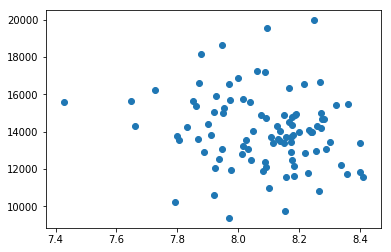

In [16]:
feature = 4
plt.scatter(x= new_x_2.iloc[:,feature], y= y)

### Train and make predictions with the new Dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(new_x_2, y, test_size=0.1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11)

In [19]:
# train
regr_738 = linear_model.LinearRegression()
regr_738.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_pred = regr_738.predict(x_train)
y_pred_val = regr_738.predict(x_val)

error_val = mean_squared_error(y_test, y_pred_val)
error_train = mean_squared_error(y_train, y_pred)

#print('Coefficients: \n', regr.coef_)  #show the weights
#show mean squared error
#print("Mean squared error: %.2f"
      #% mean_squared_error(y_val, y_pred_val))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_val))

#print((1-error_val)*100)
#print((1-error_train)*100)

Variance score: -1.82


D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate


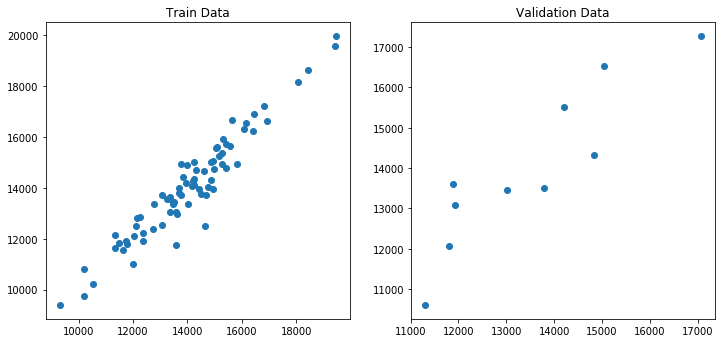

In [21]:
fig = plt.figure(figsize=(12,12))

plt.title(print(mutants.columns.get_values()[position]))


sub1 = plt.subplot(2,2,1)
sub1.set_title('Train Data')
plt.scatter(y= y_train, x=y_pred);


sub2=plt.subplot(2,2,2)
sub2.set_title('Validation Data')
plt.scatter(y= y_val, x=y_pred_val);

In [22]:
new_x_2.shape

(96, 40)

In [23]:
y.shape

(96,)

### Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

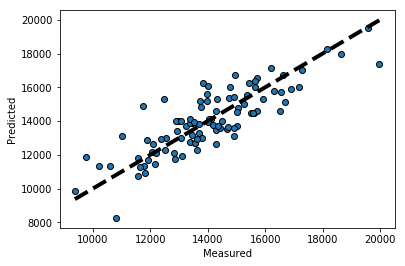

In [24]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr_738, new_x_2, y, cv=50)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [25]:
#model_filename = '../models/738.sav'
#pickle.dump(regr_738, open(model_filename, 'wb'))

### Accuracy

In [26]:
errors = abs(y_pred_val - y_val)
mape = 100 * (errors / y_val)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.2 %.


<BarContainer object of 40 artists>

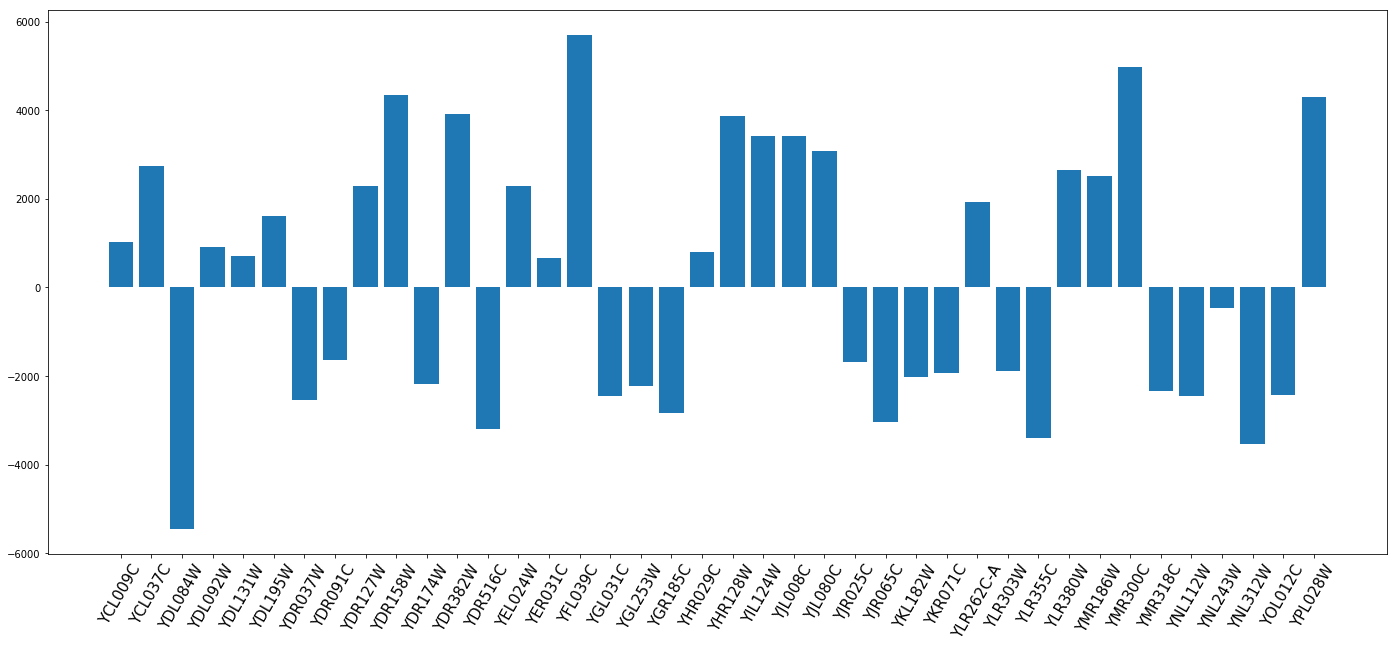

In [27]:
plt.figure(figsize=(24,10))
plt.xticks(fontsize = 15, rotation=60)
plt.bar(new_x_2.columns.get_values(), regr_738.coef_, )

In [28]:
new_x_2.columns.get_values()

array(['YCL009C', 'YCL037C', 'YDL084W', 'YDL092W', 'YDL131W', 'YDL195W',
       'YDR037W', 'YDR091C', 'YDR127W', 'YDR158W', 'YDR174W', 'YDR382W',
       'YDR516C', 'YEL024W', 'YER031C', 'YFL039C', 'YGL031C', 'YGL253W',
       'YGR185C', 'YHR029C', 'YHR128W', 'YIL124W', 'YJL008C', 'YJL080C',
       'YJR025C', 'YJR065C', 'YKL182W', 'YKR071C', 'YLR262C-A', 'YLR303W',
       'YLR355C', 'YLR380W', 'YMR186W', 'YMR300C', 'YMR318C', 'YNL112W',
       'YNL243W', 'YNL312W', 'YOL012C', 'YPL028W'], dtype=object)

In [29]:
#predictors with biological importance for D-Glucose 6-phosphate

#YCL040W Glucokinase
#YJL153C  Inositol-3-phosphate synthase
#YBR196C Glycolytic enzyme phosphoglucose isomerase
#YMR105C  Phosphoglucomutase; catalyzes the conversion from glucose-1-phosphate to glucose-6-phosphate
#YNL241C Glucose-6-phosphate dehydrogenase (G6PD)

In [30]:
#Create dataframe with the predictors from above

In [31]:
predictors = mutants[['YCL040W','YJL153C','YBR196C','YMR105C','YNL241C']]

In [32]:
predictors.head()

,YCL040W,YJL153C,YBR196C,YMR105C,YNL241C
WT,8.199483,8.745303,8.602317,6.386305,6.678008
YAL017W,8.061042,8.148348,8.653857,5.994002,6.240499
YAR018C,7.965163,7.583946,8.458909,6.078099,6.590718
YBL016W,7.864156,7.130358,8.541610,5.153374,6.710238
YBL088C,7.685407,6.882276,8.817238,5.439663,6.787224


In [33]:
all_predictors = pd.concat([predictors, new_x_2], axis=1, sort=False)

In [34]:
all_predictors.head(5)

,YCL040W,YJL153C,YBR196C,YMR105C,YNL241C,YCL009C,YCL037C,YDL084W,YDL092W,YDL131W,...,YLR355C,YLR380W,YMR186W,YMR300C,YMR318C,YNL112W,YNL243W,YNL312W,YOL012C,YPL028W
WT,8.199483,8.745303,8.602317,6.386305,6.678008,7.434493,5.205248,7.455234,4.293091,8.233438,...,9.450132,4.796860,6.997239,6.929900,6.598453,5.501056,4.033866,5.237147,6.655110,7.657049
YAL017W,8.061042,8.148348,8.653857,5.994002,6.240499,7.348111,5.660626,7.679708,4.270186,8.158083,...,9.294170,4.243918,7.166543,7.120131,6.577038,5.667768,3.909353,5.114825,6.718885,7.628511
YAR018C,7.965163,7.583946,8.458909,6.078099,6.590718,7.492098,4.948928,7.494301,4.255021,8.174248,...,9.140197,5.180847,7.156408,7.150544,6.631992,5.654734,4.087856,5.333319,6.426547,7.841001
YBL016W,7.864156,7.130358,8.541610,5.153374,6.710238,7.658993,6.032080,7.862184,5.146593,8.231076,...,9.530802,4.706193,7.433619,7.688515,6.886398,4.976620,3.516774,5.100964,6.889802,7.381356
YBL088C,7.685407,6.882276,8.817238,5.439663,6.787224,7.331100,5.764368,7.821718,4.319284,7.923199,...,9.437055,4.581793,7.391868,7.209853,6.232029,5.497865,2.831103,5.017645,6.784534,7.432871


### Train and make predictions with all_predictors

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(all_predictors, y, test_size=0.1)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11)

In [37]:
#make predictions and compare


regr_3 = linear_model.LinearRegression()
regr_3.fit(x_train, y_train)

y_pred = regr_3.predict(x_train)
y_pred_val = regr_3.predict(x_val)

error_val = mean_squared_error(y_val, y_pred_val)
error_train = mean_squared_error(y_train, y_pred)

#print('Coefficients: \n', regr.coef_)  #show the weights
#show mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_pred_val))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, y_pred_val))

#print((1-error_val)*100)
#print((1-error_train)*100)

Mean squared error: 1846521.11
Variance score: 0.55


D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate


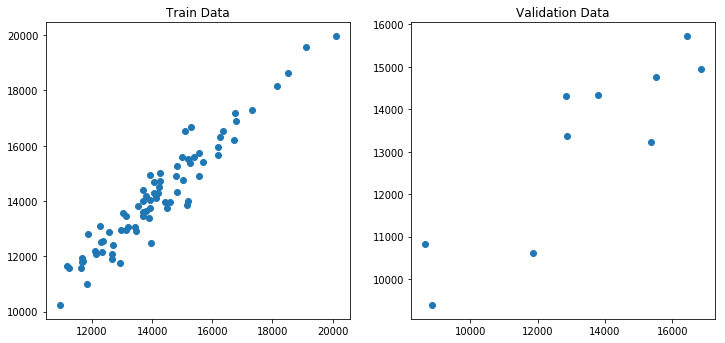

In [38]:
fig = plt.figure(figsize=(12,12))

plt.title(print(mutants.columns.get_values()[position]))


sub1 = plt.subplot(2,2,1)
sub1.set_title('Train Data')
plt.scatter(y= y_train, x=y_pred);


sub2=plt.subplot(2,2,2)
sub2.set_title('Validation Data')
plt.scatter(y= y_val, x=y_pred_val);

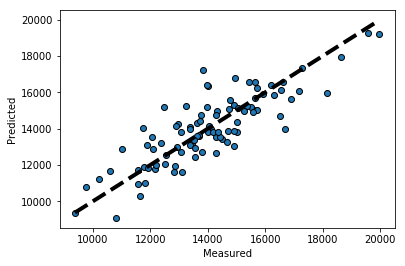

In [39]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr_3, all_predictors, y, cv=50)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [40]:
errors = abs(y_pred_val - y_val)
mape = 100 * (errors / y_val)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.65 %.


<BarContainer object of 45 artists>

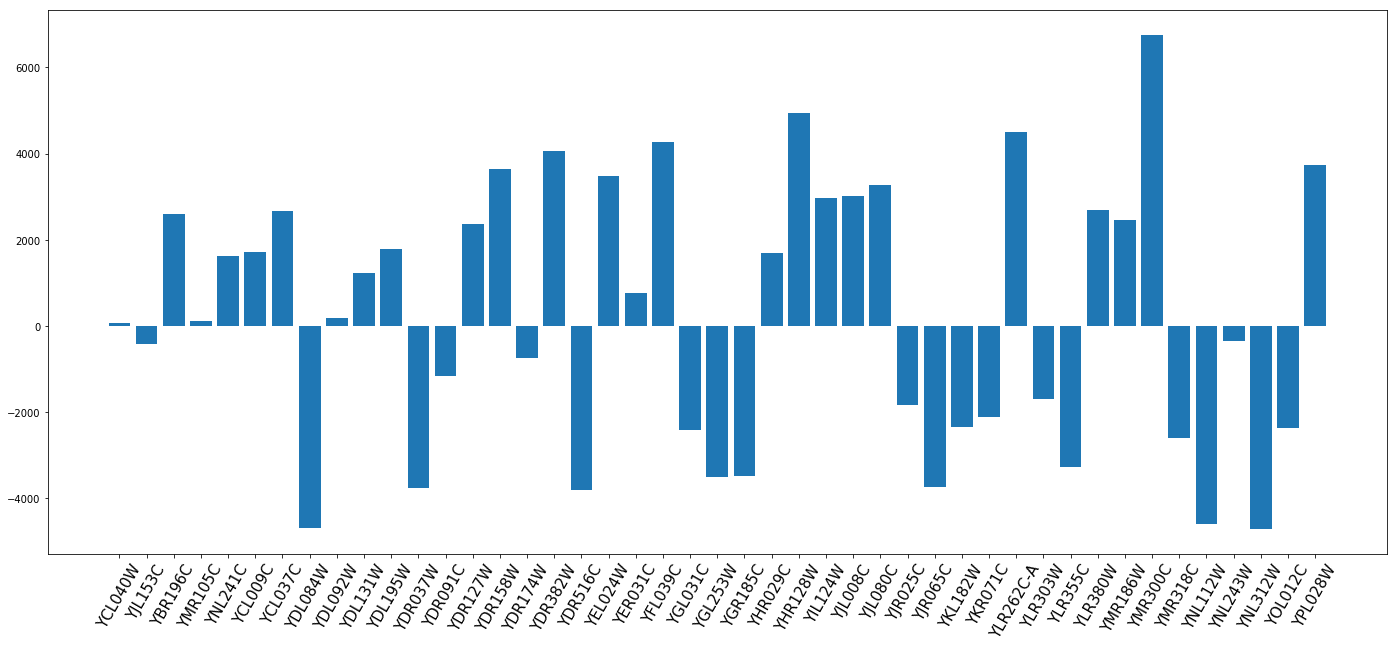

In [41]:
plt.figure(figsize=(24,10))
plt.xticks(fontsize = 15, rotation=60)
plt.bar(all_predictors.columns.get_values(), regr_3.coef_, )


In [42]:
# What are the targets (proteins) that all these metabolites have in common?
#what have the metabolites (targets) in common?